<a href="https://colab.research.google.com/github/luccasena/Fabrica-de-Software-Dados/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# importas as bibliotecas:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dados1.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74.0
1,female,group C,some college,standard,completed,69.0,90,88.0
2,female,group B,master's degree,standard,none,90.0,95,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57,44.0
4,male,group C,some college,standard,none,76.0,78,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99,95.0
996,male,group C,high school,free/reduced,none,62.0,55,55.0
997,female,group C,high school,free/reduced,completed,59.0,71,65.0
998,female,group D,some college,standard,completed,68.0,78,77.0


In [48]:
df.shape

(1000, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   999 non-null    float64
 6   reading score                1000 non-null   int64  
 7   writing score                999 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [50]:
df.describe()

,math score,reading score,writing score
count,999.00000,1000.000000,999.000000
mean,66.08008,69.169000,68.065065
std,15.16805,14.600192,15.199237
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,58.000000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
# Verificar se há valores nulos:

df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,1
reading score,0
writing score,1


In [52]:
df = df.dropna()

In [53]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [54]:
df.drop(labels=['lunch'], axis=1)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72.0,72,74.0
1,female,group C,some college,completed,69.0,90,88.0
2,female,group B,master's degree,none,90.0,95,93.0
3,male,group A,associate's degree,none,47.0,57,44.0
4,male,group C,some college,none,76.0,78,75.0
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88.0,99,95.0
996,male,group C,high school,none,62.0,55,55.0
997,female,group C,high school,completed,59.0,71,65.0
998,female,group D,some college,completed,68.0,78,77.0


In [55]:
mean_math = df['math score'].mean()
mean_math

66.08917835671343

In [56]:
mean_reading = df['reading score'].mean()
mean_reading

69.16132264529058

In [57]:
mean_writing = df['writing score'].mean()
mean_writing

68.04509018036072

In [64]:
max_math = df['math score'].max()
max_math

100.0

In [66]:
min_math = df['math score'].min()
min_math

0.0

In [78]:
group_race_math_mean = df.groupby(['race/ethnicity'])['math score'].mean()
group_race_math_mean

,math score
race/ethnicity,
group A,61.629213
group B,63.486772
group C,64.463950
group D,67.333333
group E,73.821429


<Axes: xlabel='race/ethnicity'>

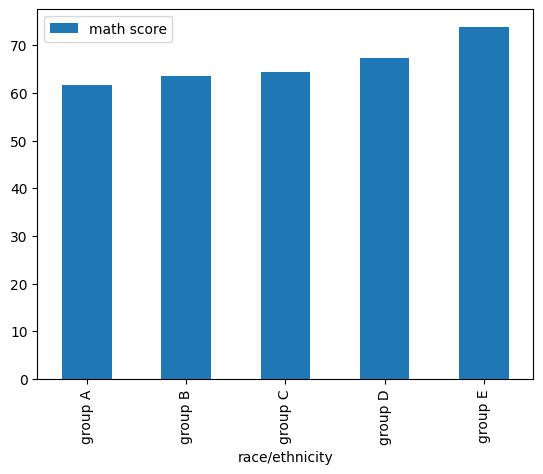

In [81]:
df2 = df.groupby('race/ethnicity')[['math score']].mean()
df2.plot(kind='bar')

Grupo E apresenta ter geralmente as notas mais altas do que os demais grupos.

<Axes: xlabel='parental level of education'>

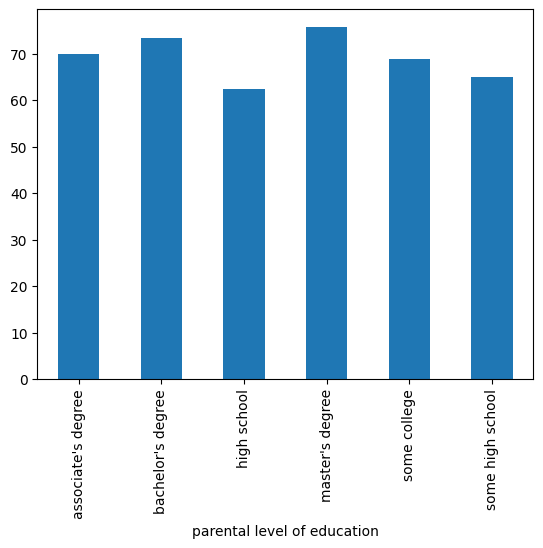

In [86]:
df2 = df.groupby('parental level of education')['writing score'].mean()
df2.plot(kind='bar')

Alunos nas quais os pais possuem um título de mestrado, apresentam notas maiores na escrita do que os demais grupos.

In [83]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: xlabel='test preparation course'>

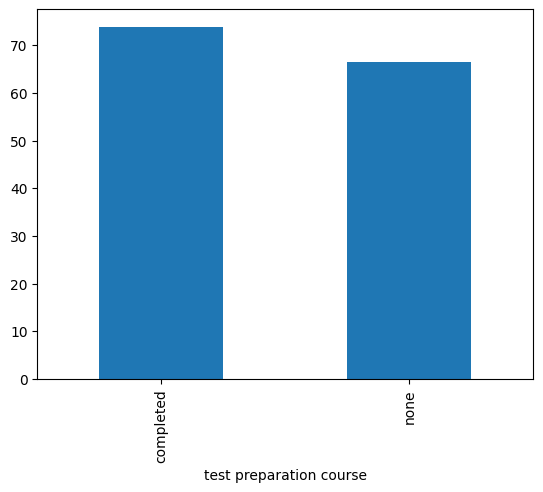

In [87]:
df2 = df.groupby('test preparation course')['reading score'].mean()
df2.plot(kind='bar')

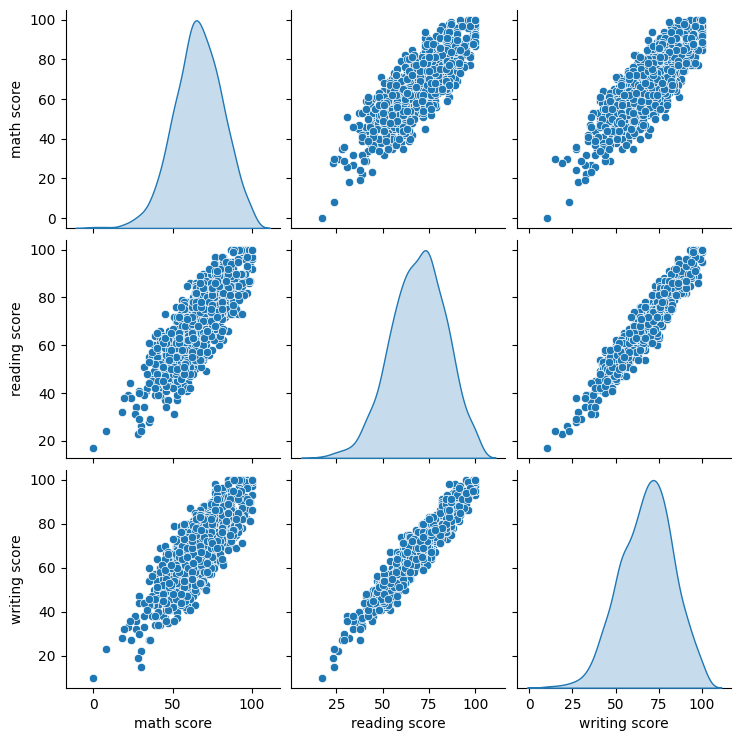

In [88]:
sns.pairplot(df[['math score', 'reading score', 'writing score']], diag_kind='kde')
plt.show()

In [ ]:
sns.pairplot(df[['math score', 'reading score', 'writing score']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Distribuição')

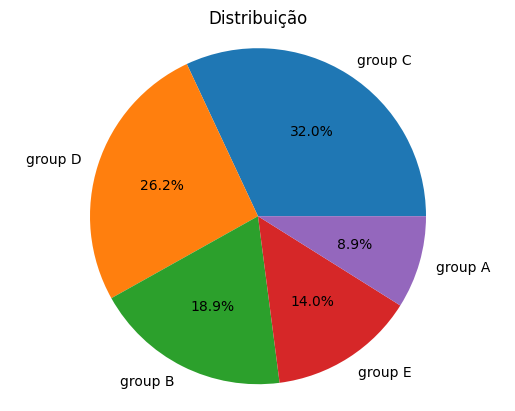

In [95]:
race_counts = df['race/ethnicity'].value_counts()
plt.pie(race_counts,labels=race_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribuição')

<Axes: xlabel='math score', ylabel='Count'>

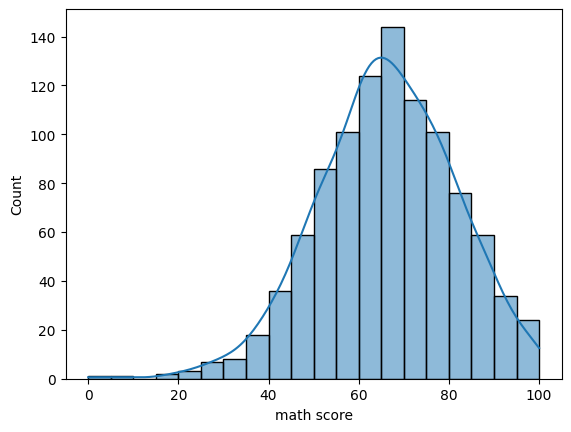

In [96]:
sns.histplot(df["math score"], bins=20, kde=True)